<a href="https://colab.research.google.com/github/icaroperetti/artificial-intelligence/blob/main/redes-neurais/rna_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

# Dataset
# https://www.kaggle.com/datasets/somesh24/spambase?select=spambase_csv.csv  

file_path = 'https://raw.githubusercontent.com/icaroperetti/spam-kaggle-csv/main/spambase_csv.csv'

# load the dataset
dataset = np.loadtxt(file_path,delimiter=",")


X = dataset[:,0:57] # Dados
y = dataset[:,57] # Classe 0 - Não é spam  1 - É spam


X = Normalizer().fit(X).transform(X)

print(X.shape,y.shape)

# print(X,'\n\n',y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# Modelo Sequencial
model = Sequential()

#input_dim: Dimensão de entrada, quantos atributos existem na base de dados exceto valor classe
model.add(Dense(100, input_dim=X.shape[1], activation='relu'))  # relu - Está entre as melhores funções de ativação
model.add(Dropout(0.3)) 
model.add(Dense(33, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(11, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) # Independente da ativação que o neurônio de a saida será 0 ou 1

# compile the keras model
# binary_crossentropy: Função de erro, visto que o problema é binário 
# adam: Passa todos as amostras pela rede, calcula o erro por meio da funão de 
# loss e faz a otimização voltando e ajustando os pesos
# accuracy: Avaliar se a rede está melhorando ou não - Vetor da classe
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#X_train: De onde os dados virão para realizar o treinamento
#y_train: Dados utilizados para verificar se a rede está aprendendo ou não
#batch_size: Número de amostras que irão passar pela rede neural a cada treinamento 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=128) # fit the keras model on the dataset

print(history.history.keys())

# Verificar o quanto o modelo aprendeu
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))



(4601, 57) (4601,)
(3680, 57) (3680,) (921, 57) (921,)
Epoch 1/200
29/29 [==============================] - 1s 9ms/step - loss: 0.6773 - accuracy: 0.6065 - val_loss: 0.6799 - val_accuracy: 0.5765
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 0.6635 - accuracy: 0.6136 - val_loss: 0.6647 - val_accuracy: 0.5765
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 0.6445 - accuracy: 0.6158 - val_loss: 0.6320 - val_accuracy: 0.5765
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.6280 - val_loss: 0.5861 - val_accuracy: 0.6612
Epoch 5/200
29/29 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.6562 - val_loss: 0.5414 - val_accuracy: 0.6721
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 0.5315 - accuracy: 0.7071 - val_loss: 0.4977 - val_accuracy: 0.7318
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 0.4992 - accuracy: 0.7421 

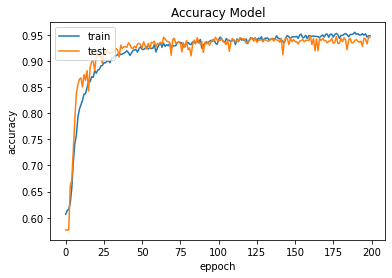

In [9]:
# Gráfico da acurácia
figure = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('eppoch')
plt.legend(['train', 'test'], loc='upper left')
figure.savefig('acc.pdf', dpi=figure.dpi)

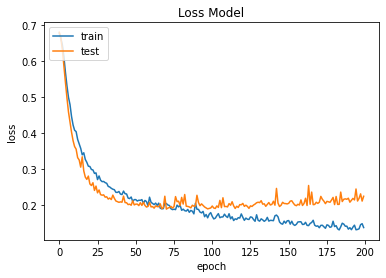

In [8]:
# Gráfico do LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss.pdf')
plt.show()


--- Confusion Matrix ---



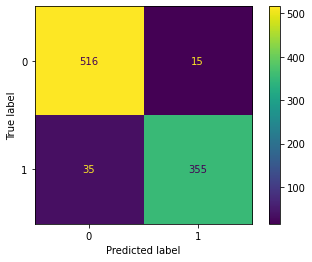

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = (model.predict(X_test) > 0.5).astype("int32") # Vetor com a classificação de cada amostra do teste
# print("Pred",pred)

# Primeiro parametro: O que realmente é
# Segundo parametro: O que a rede retornou como verdade
confusionMatrix = confusion_matrix(y_test, pred)
# print(confusionMatrix)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
confusion_matrix_display.plot()
print("\n--- Confusion Matrix ---\n")
plt.show()



In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

tpr = tp / (tp + fn) # True Positive
tnr = tn / (tn + fp) # True Negative

print('Verdadeiro Negativo: ', tn)
print('Falso Positivo:', fp)
print('Falso Negativo:', fn)
print('Verdadeiro Positivo:', tp)

# Calculo acurácia - os verdadeiros positivos e os verdadeiros negativos / soma de tudo
acc = (tp + tn) / (tp + tn + fp + fn) 

print('\n')
print("TPR:%.3f" % (tpr*100))
print("TNR:%.3f" % (tnr*100))
print("ACC:%.3f" % (acc*100))

Verdadeiro Negativo:  516
Falso Positivo: 15
Falso Negativo: 35
Verdadeiro Positivo: 355


TPR:91.026
TNR:97.175
ACC:94.571
